<a href="https://colab.research.google.com/github/santhiravuri/generative-ai-internship/blob/main/day13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn


In [2]:
class Generator(nn.Module):
    def __init__(self, noise_dim=100, img_dim=28*28):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(noise_dim, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(True),

            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(True),

            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(True),

            nn.Linear(1024, img_dim),
            nn.Tanh()  # Output between [-1, 1] for normalized MNIST
        )

    def forward(self, z):
        return self.model(z)


In [3]:
class Discriminator(nn.Module):
    def __init__(self, img_dim=28*28):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(img_dim, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),

            nn.Linear(256, 1),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)


In [4]:
# Instantiate models
generator = Generator()
discriminator = Discriminator()

# Create random noise
z = torch.randn((16, 100))  # batch_size=16, noise_dim=100

# Generate fake images
fake_images = generator(z)

# Flattened shape: (batch_size, 28*28)
# To view or train, reshape as needed: fake_images.view(-1, 1, 28, 28)


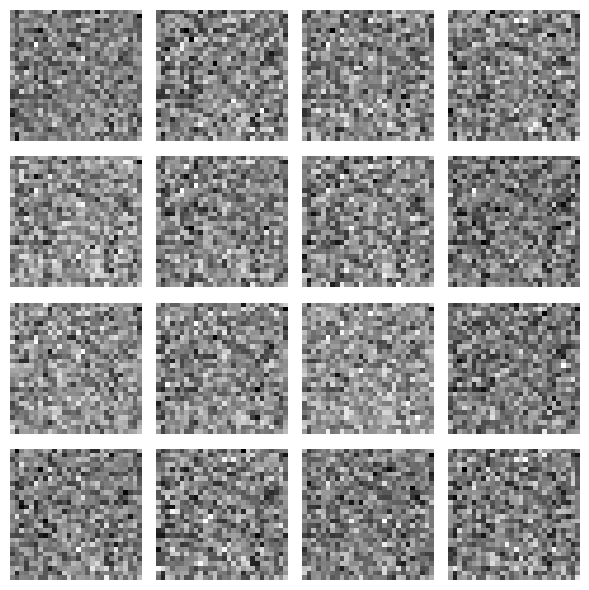

In [5]:
import torch
import matplotlib.pyplot as plt

# Assuming the Generator class is already defined and imported
generator = Generator()
generator.eval()  # Set to eval mode for BatchNorm

# Generate noise
z = torch.randn((16, 100))  # batch size of 16
fake_images = generator(z)

# Reshape images to 28x28
fake_images = fake_images.view(-1, 1, 28, 28)
fake_images = (fake_images + 1) / 2  # Rescale from [-1, 1] to [0, 1]

# Plot images
fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(fake_images[i].detach().squeeze(0), cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()
